# Using Base64 String Image in Python
This is an example of processing a base64 string image in Python and outputting the processed base64 image. This idea is core to the program's functionality.

To use a base64 string image in Python, you need to decode the string using the `base64` module and then convert it into an image object using the `PIL` (Python Imaging Library) module. Once you have the image object, you can perform various image processing operations on it.

In [1]:
import base64
import numpy as np
import cv2
from IPython.display import display
from PIL import Image
from io import BytesIO

In [23]:
def display_bw_image(base64_str):
    # Decode base64 string to binary data
    binary_data = base64.b64decode(base64_str)

    # Convert binary data to numpy array
    np_arr = np.frombuffer(binary_data, dtype=np.uint8)
    
    # Decode the numpy array to an image
    image = cv2.imdecode(np_arr, cv2.IMREAD_GRAYSCALE)

    print(image, image.shape, type(image), len(image[0]), len(image))
    
    # Convert the OpenCV grayscale image to a PIL Image
    pil_image = Image.fromarray(image)

    # Display the black and white image in the Jupyter notebook
    display(pil_image)
    
    return pil_image

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] (491, 1116) <class 'numpy.ndarray'> 1116 491


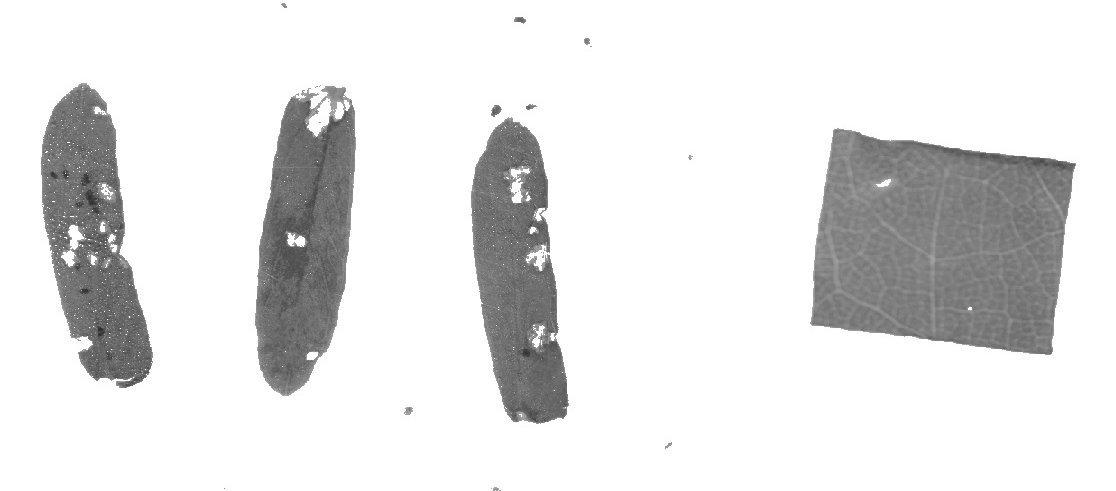

In [24]:
# Read data URI from the file
with open('base64_example.txt', 'r') as file:
    data_uri = file.read()

# Extract the base64 string from the data URI
base64_str = data_uri.split(',')[1]

# Call the function to display the black and white image
pil_image = display_bw_image(base64_str)

In [14]:
buffered = BytesIO()
pil_image.save(buffered, format="png")

# Encode the contents of the BytesIO object as base64
base64_bytes = base64.b64encode(buffered.getvalue())

# Convert the base64 bytes to a string
base64_string = base64_bytes.decode('utf-8')

# Add URI prefix to the base64 string
uri_prefix = 'data:image/png;base64,'
uri_string = uri_prefix + base64_string

# Write the base64 string to a file
with open('base64_output_test.txt', 'w') as f:
    f.write(uri_string)
